<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn

In [3]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que se haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

In [77]:
dyear= dataset.groupby(by="year", as_index=False).size().reset_index(name='counts')
dyear

,year,counts
0,1988.0,1
1,1989.0,1
2,1990.0,5
3,1991.0,5
4,1993.0,2
5,1994.0,3
6,1996.0,1
7,1997.0,1
8,1998.0,2
9,1999.0,2


### Distribución de los eventos por año

Text(0.5,0,'Años')

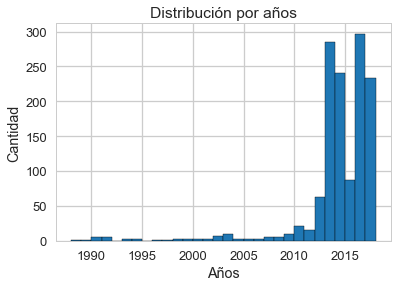

In [9]:

#dyear.plot(kind="bar")

plt.title("Distribución por años")
plt.hist(dataset["year"].dropna(),bins=list(range(1988,2019)),edgeColor= "black")
plt.ylabel("Cantidad")
plt.xlabel("Años")

### Frecuencia de probabilidades

In [68]:
dfpsyear= pandas.crosstab(index=dataset["year"],
                    columns="count")
dfpsyear=dfpsyear/dfpsyear.sum()


Text(0.5,1,'Frecuencia de Probabilidades')

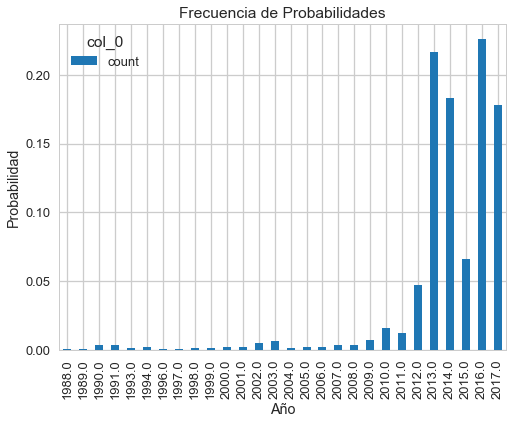

In [69]:
dfpsyear.plot(kind="bar",figsize=(8,6))
plt.xlabel("Año")
plt.ylabel("Probabilidad")
plt.title("Frecuencia de Probabilidades")

La distribución muestra un aumento en general de los casos relevados de violencia institucional.
Los gráficos de distribución de los eventos y la frecuencia de probabilidades son parecidos, pero la distribución de eventos además muestra la cantidad de eventos, no solo la proporción con respecto al total.

### Distribución acumulada

Text(0.5,0,'Años')

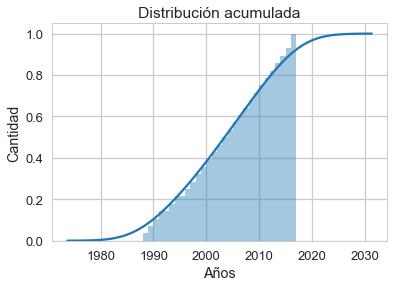

In [70]:
seaborn.distplot(dyear["year"].dropna(),bins=list(range(1988,2018)),  #la unica forma que pude hacer este grafico de densidad acumulada
             hist_kws={'cumulative': True} ,
          kde_kws={'cumulative': True})
plt.title("Distribución acumulada")
#plt.hist(dataset["year"].dropna()/dataset["year"].sum(),edgeColor= "black",cumulative="true")
plt.ylabel("Cantidad")
plt.xlabel("Años")



La probabilidad de que se haya dado un acto de violencia antes del ultimo cambio de gobierno es

In [99]:
dfpsyear["count"][1988:2015].sum() #Suma las probabilidades de los eventos hasta 2015

0.5965045592705167

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

 Tabla de frecuencia $fdp(X)$ del evento  X = ’provincia donde se desarrollo el hecho’

In [13]:
fdp = pandas.crosstab(index=dataset["provincia"],  # Make a crosstab
                      columns="count")      # Name the count column
fdp = fdp/fdp.sum()
fdp

col_0,count
provincia,
Buenos Aires,0.693182
Catamarca,0.001420
Chaco,0.020597
Chubut,0.026278
Ciudad de Buenos Aires,0.083097
Corrientes,0.003551
Córdoba,0.036932
Entre Rios,0.006392
Formosa,0.007102


[Text(0,0.5,'Probabilidad'), Text(0.5,0,'Provincia')]

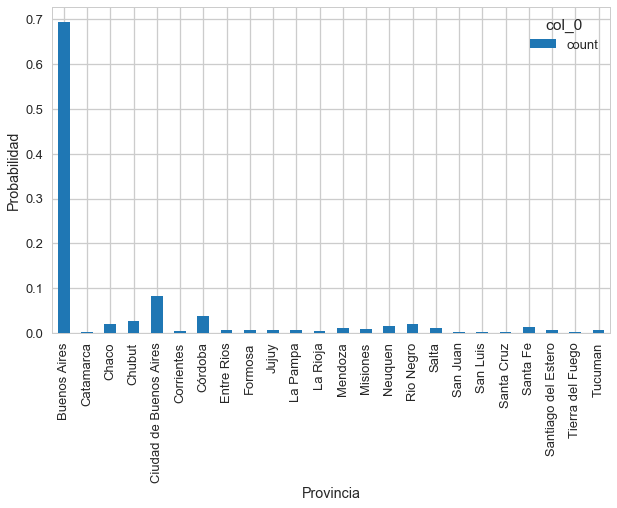

In [14]:
ax= fdp.plot(kind="bar",figsize=(10,6)) #no tengo idea sobre la pregunta que dice que otro dato hace falta para mostrar los datos
ax.set(xlabel="Provincia", ylabel="Probabilidad")

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [129]:
tde= pandas.crosstab(index=dataset["provincia"],  # Tabla de doble entrada
                      columns=dataset["year"],normalize="all")      
tde

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.002299,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.000766,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766


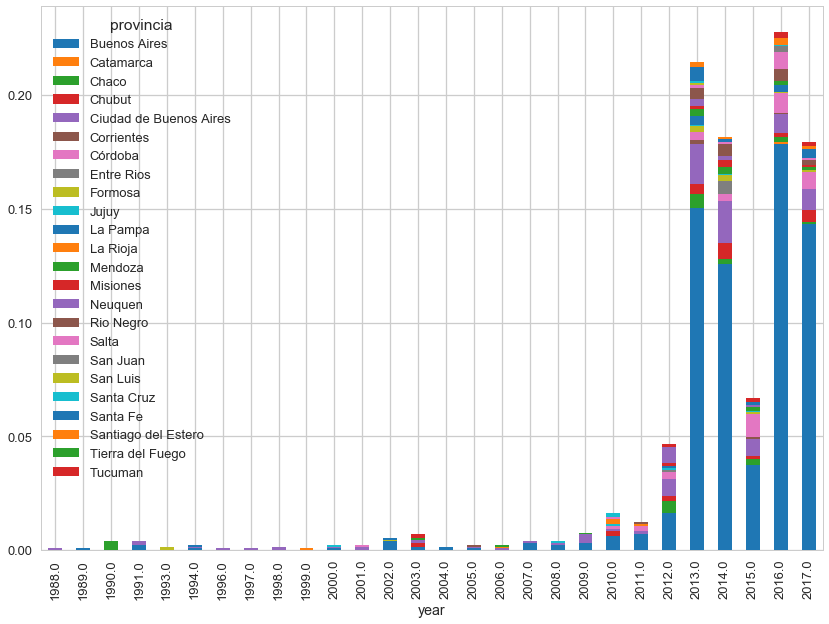

In [130]:

tde.transpose().plot.bar(stacked=True,figsize=(14,10)) # Grafico de barras acumulativo, pero hay demasiadas provincias y queda un quilombo

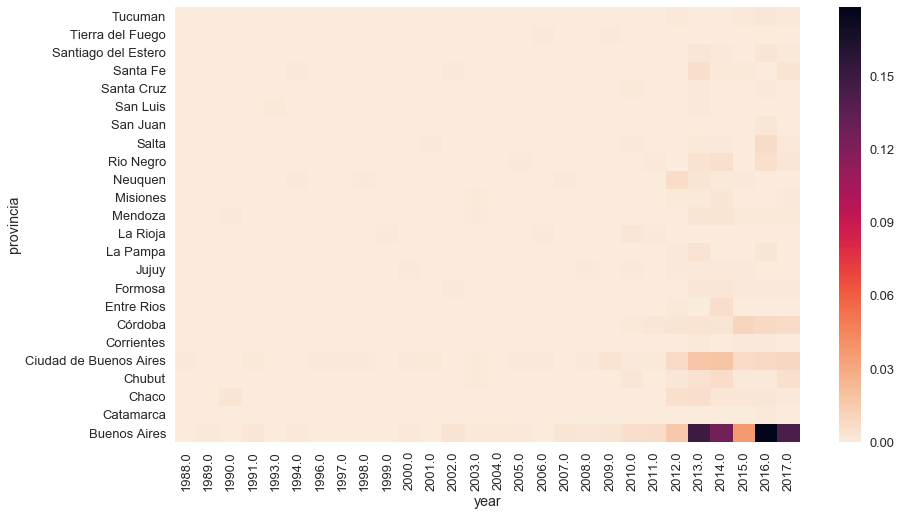

In [131]:
plt.figure(figsize=(14,8)) #tamaño figura
ax= seaborn.heatmap(tde,xticklabels=1, yticklabels=1,cmap=seaborn.cm.rocket_r) #heatmap se ve un poco mejor
ax.invert_yaxis()

No son variables independientes

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [18]:
dataset["contexto1"].unique() #muestra valores distintos

array(['Penal / Complejo Penitenciario PROVINCIAL', 'Comisaría',
       'Penal / Complejo Penitenciario FEDERAL', 'Espacio Público',
       'Instalaciones de la Gendarmería Nacional', 'Domicilio Particular',
       'Hospital General',
       'Centros de Detención Previos al Juicio (Alcaidia)', nan,
       'Lugar No Identificado',
       'Móviles y medios de transporte de Fuerzas de Seguridad',
       'Centros de Alojamiento para Personas Menores de Edad',
       'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)',
       'Escuelas de Formación Fuerzas Nacionales',
       'Establecimiento de Salud Mental',
       'Escuelas de Formación Fuerzas Provinciales',
       'Establecimiento de Rehabilitación de Adicciones',
       'Centros de Detención Preventiva'], dtype=object)

In [19]:
n = dataset[dataset['contexto1'].str.contains("Penal|Fuerzas|Centros|Comisaría|Gendarmería",na=False)].shape[0] #seleccionando los casos relacionados a dependencias de seguridad
n

1125

In [20]:
fdpz= n/ dataset["contexto1"].dropna().shape[0] #probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)
fdpz 

0.8122743682310469

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [21]:
dataset.isnull().sum()

area                          1
organismo_origen             56
via_acceso                   16
año                         123
provincia                    31
contexto                     42
contexto1                    54
circunstancia              1283
alojamiento                1155
violencia_fisica            849
violencia_psiquica          952
violencia_genero           1390
violencia_salud             994
resumen_hecho              1439
descripcion_institucion     167
establecimiento             864
Unnamed: 16                1439
year                        123
dtype: int64

In [22]:
dataset["violencia_psiquica"].dropna().unique()

array(['Alejamiento de vínculos', 'Otras formas de maltrato psicológico',
       'Extorsión, forzamiento de la conducta, incitación a la violencia, Alejamiento de vínculos',
       'Hostigamiento, Amenazas',
       'Otras formas de maltrato psicológico, Ablandamiento',
       'Ablandamiento', 'Hostigamiento',
       'Restricción injustificada derechos al trabajo y la educación, Ablandamiento',
       'Restricción injustificada derechos al trabajo y la educación',
       'Restricción injustificada de contacto', 'Disparos intimidatorios',
       'Hostigamiento, Extorsión, forzamiento de la conducta, incitación a la violencia',
       'Amenazas',
       'Restricción injustificada derechos al trabajo y la educación, Otras formas de maltrato psicológico',
       'Ninguno',
       'Otras formas de maltrato psicológico, Alejamiento de vínculos',
       'Extorsión, forzamiento de la conducta, incitación a la violencia, Amenazas',
       'Otras formas de maltrato psicológico, Restricción injust

In [23]:
dataset[~dataset['violencia_psiquica'].isnull()].shape[0] 

487

In [24]:
dataset[~dataset['violencia_psiquica'].str.contains("Ninguno",na=True)].shape[0] #cuenta cuantos casos tuvieron violencia psiquica

484

In [25]:
dataset[~dataset['violencia_fisica'].isnull()].shape[0]

590

In [26]:
dataset[~dataset['violencia_fisica'].str.contains("Ninguno",na=True)].shape[0] #cuenta cuantos casos no tuvieron violencia psiquica

585

In [29]:
dataset[~dataset['violencia_psiquica'].isnull() & ~dataset['violencia_fisica'].isnull()].shape[0] 

126

In [28]:
dataset[~dataset['violencia_psiquica'].str.contains("Ninguno",na=True) & ~dataset['violencia_fisica'].str.contains("Ninguno",na=True)].shape[0] #cuenta cuantos casos tuvieron violencia fisica y psicologica

124

$P(N~~|~~M)=\dfrac{P(N\cap M)}{P(M)}=\dfrac{124}{126}\dfrac{585}{590}\simeq 0,9925 $

$P(N)=\dfrac{484}{487}\simeq 0,9938 $

Entonces podemos considerar que son independientes dadas las muestras
